# TP4 : Doing a soup with Beautiful Soup

## Beginning

### [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

# Quests
- Scrap one table and put the result in a CSV
- Scrap another table and using Pandas (PW1) to manipulate those data (plotting)
- Scrap all the table in the page 


## Target

We'll try to scrap data from Dehli MCD Election from this URL http://www.elections.in/delhi/mcd-elections/


## Importing librairies
Here, we are going to use 3 differents librairies :
- `urllib` to go to the webpage and get all the page (GET request)
- `BeautifulSoup` for reading the HTML file
- `csv` to write the result inside a CSV

In [79]:
from bs4 import BeautifulSoup
import urllib
import csv

## Get the web page

Our data are in webpage, organized with HTML markups which we can see in web browser. We'll download the webpage and parse it to get data.

### Docs:
* urllib request: https://docs.python.org/3.4/library/urllib.request.html#module-urllib.request
* BeautifulSoup Quickstart: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start


### Download data

 1. Perform a request to the specific URL and put the HTML page inside a variable.
 2. Parse HTML data received before
 3. Display title of the page
 
#### Do it yourself

In [86]:
# Put URL in a variable
DEHLI_MCD_URL = 'http://www.elections.in/delhi/mcd-elections/'
# Open URL with urllib and read data into a variable
html = urllib.request.urlopen(DEHLI_MCD_URL).read()
# Parse HTML variable with BeautifulSoup() method and put it in a variable
soup = BeautifulSoup(html, 'html.parser')
# Use print function to display "title" field of the webpage.
print(soup.title.string)

Delhi MCD Election Results 2017, Party and Ward Wise


## Scraping

You can choose any markup you want in this page. For that you to stay close of the "code source view" of the page to know which explicit markup you want to scrap.

### Docs
* BeaufifulSoup find functions: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#calling-a-tag-is-like-calling-find-all


### Scrap it !

 1. Display the number of `<table>` statement in the page
 2. Scrap the table "Delhi Municipal Corporation Wards and Seats Reservation" (which is the seventh `<table>` in HTML)
 3. Display the data

#### Do it yourself


In [110]:
# Find all the <table> markups in the HTML with findAll() function and put them in a variable
tables = soup.findAll('table')
# Print the number of tables in the page with len() method
print(len(tables))
# Get the seventh table using previous variable (careful: tables's ids start from 0). Put it in a variable.
table = tables[6]
# Find all rows (<tr> markups>) of the table, using the variable created before
rows = table.findAll('tr')
# Optionnal: Print raw data to verify what you have scrapped. 
print(rows)

11
[<tr class="tableizer-firstrow"><th>Municipal Corporation Name</th><th>Total Wards</th><th>Seats for General Candidates</th><th>Seats reserved for Woman (SC)</th><th>Seats reserved for SCs</th><th>Seats reserved for Woman</th></tr>, <tr><td>North</td><td>104</td><td>42</td><td>10</td><td>10</td><td>42</td></tr>, <tr><td>South</td><td>104</td><td>44</td><td>8</td><td>7</td><td>45</td></tr>, <tr><td>East</td><td>64</td><td>26</td><td>6</td><td>5</td><td>27</td></tr>]


## Export your data

With those data you can export them in a file to work with your favorite software. We'll see how to export them to a CSV file which a simple format and can be used with many softwares.

### Docs

* Manipulate CSV file: https://docs.python.org/2/library/csv.html
* Python Data structures: https://docs.python.org/3.4/library/urllib.request.html#module-urllib.request

### Writing CSV file

1. Open a CSV file with write rule
2. Write data in the file


#### Do it yourself

In [113]:
# open a CSV file with open() function
with open('scraping_output.csv', 'w') as csvfile:
# Use csv library to open writer handle with opened file
    writer = csv.writer(csvfile)
# Make a loop to extract rows data in tuple, then write it to handle   
    for i in rows:
        data = tuple(td.text for td in i)
        writer.writerow(data)
# Check your file in Jupyter's work folder

## Use your data

Now you have web page selected data in a variable or a file, you can use them to make visualization like we've seen in `TP1 - Adopt Python`

### Docs

* See `TP1 - Adopt Python`
* Pandas Area Plot: https://pandas.pydata.org/pandas-docs/stable/visualization.html#area-plot

### Visualize

 1. Open your created CSV file 
 2. Organize data
 3. Do a vizualization of some fields

#### Do it yourself

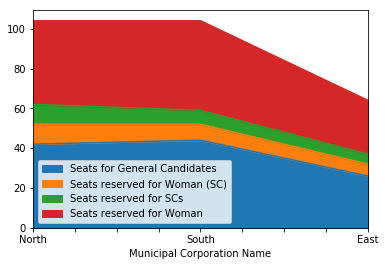

In [135]:
# Allow matplotlib to show visualation in Jupyter
%matplotlib inline
#import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file created before. Put its content in a variable
data = pd.read_csv('scraping_output.csv')
# Use DataFrame method to create the data structure. Put it in a variable.
df = pd.DataFrame(data)
# Select all columns except 'Total Wards'. Put it in a variable.
columns = df.drop('Total Wards', axis=1)
# Display an area plot by 'Municipal Corporation Name'
columns.plot.area(x=df['Municipal Corporation Name'])
